<a href="https://colab.research.google.com/github/Shyam-S-Mishra/Shyam_S_Mishra_Supervised-ML_Capstone_Project_Classification/blob/main/Shyam_Shubham_Mishra_Supervised_ML_Capstone_Project_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>
# Problem Statement

In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone (eg - RAM Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is. 

> 
# Let's Begin

>
# Know Your Data

>
## Importing Libraries

In [3]:
# Importing libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import StackingClassifier

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings("ignore")

>
## Dataset Loading

In [1]:
# Mounting Drive 

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing Dataset 

dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Classification_Capstone_Project_Supervised_ML/data_mobile_price_range.csv')

>
## Dataset First View

In [5]:
# Dataset First Look

dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


>
## Dataset Rows and Columns Count

In [8]:
# Dataset Rows & Columns

dataset.shape

(2000, 21)

>
## Dataset Information

In [9]:
# Dataset Information

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

>
## Looking for Duplicate Values

In [10]:
# Counting duplicate values in the dataset 

len(dataset[dataset.duplicated()])

0

>
## Checking for Null Values

In [11]:
# Finding null values in the dataset

print(dataset.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


>
## About the Dataset

The above given dataset has various features about the specifications of mobile phones which determines the price of the mobile phone.

The given dataset has 2000 rows and 21 columns. There are no missing values and duplicate values in the dataset. 

The goal is to build a machine learning model that predicts the price range of the mobile phone indicating how high the price is.

>
# Understanding the Variables

In [12]:
# Dataset Columns

dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [14]:
# Dataset Description

dataset.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [15]:
# Checking unique values for each variable

dataset.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

>
# Feature and Target Details

>
## Feature Details

Battery_power - Battery capacity in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory capacity

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in MB

Sc_h - Screen Height

Sc_w - Screen Width 

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not


>
## Target Details

Price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)

>
# Exploratory Data Analysis

In [51]:
# splitting the categorical and numerical features for analysig the dataset

numerical_features = dataset[['battery_power',  'clock_speed' , 'fc','int_memory','m_dep', 'mobile_wt','n_cores', 'pc',
                      'px_height','px_width','ram', 'sc_h', 'sc_w', 'talk_time']]

categorical_features = dataset[['blue','dual_sim', 'four_g','three_g','touch_screen', 'wifi']]

In [21]:
# Counting the value vounts of the dependent variable 

dataset['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

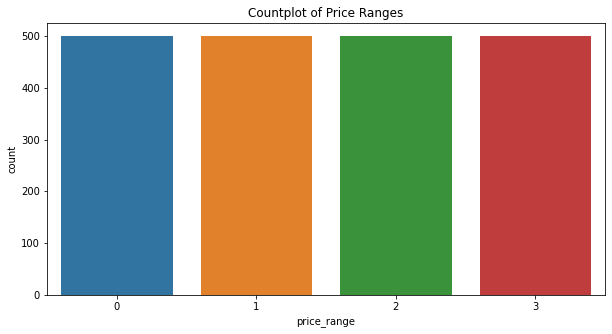

In [23]:
# Visualizing the dependent variable i.e. Price_range

plt.figure(figsize=(10,5))
sns.countplot(dataset['price_range'])
plt.title('Countplot of Price Ranges')
plt.show()

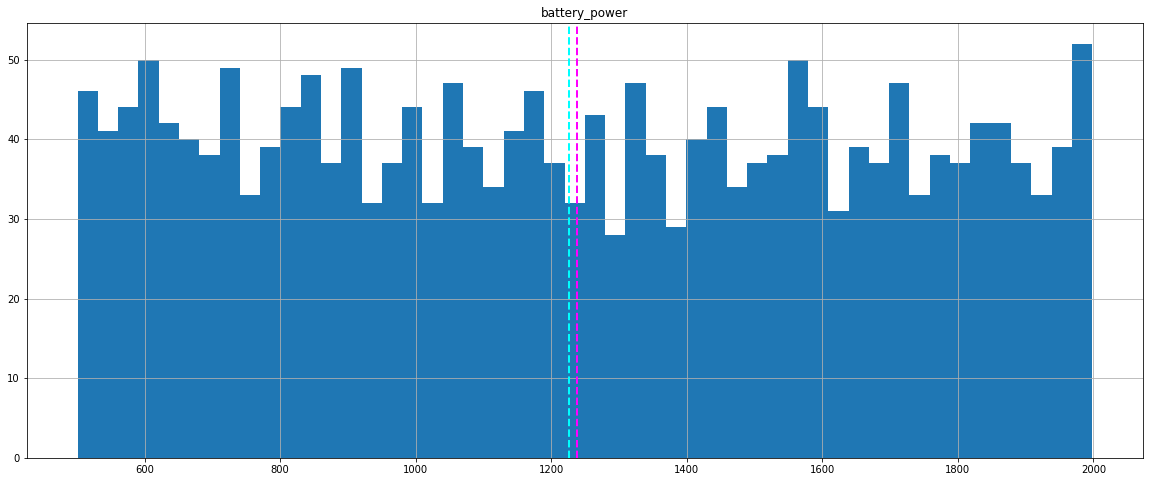

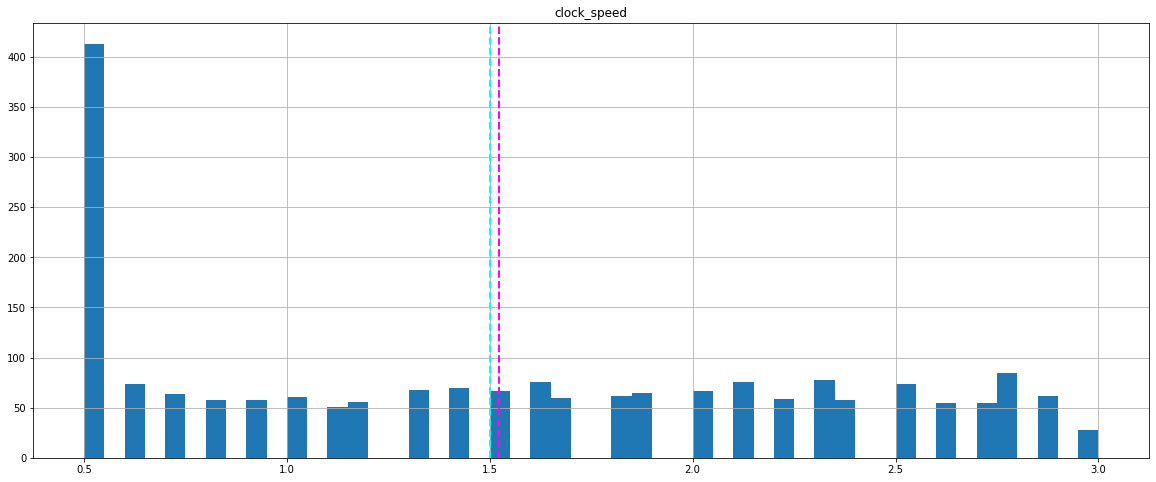

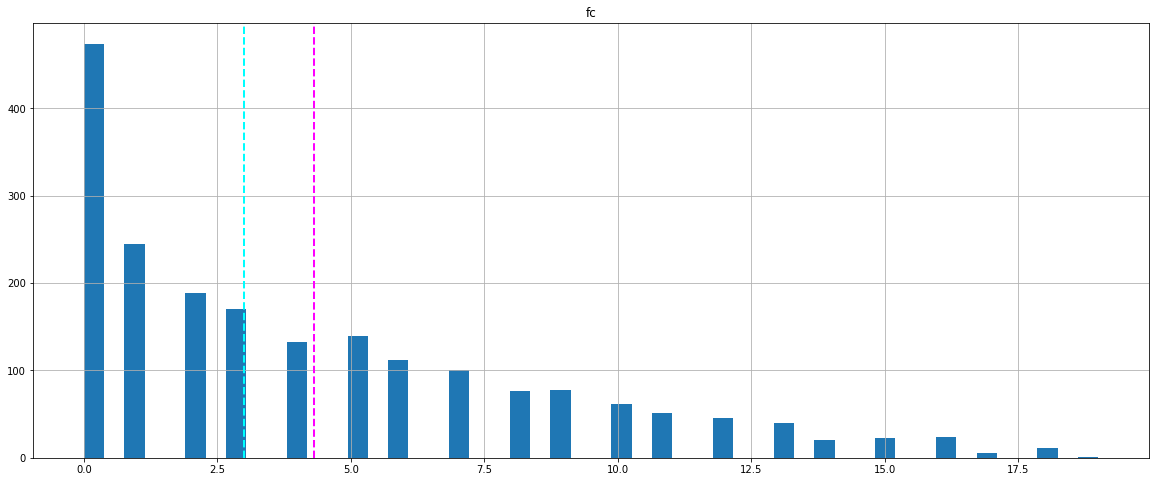

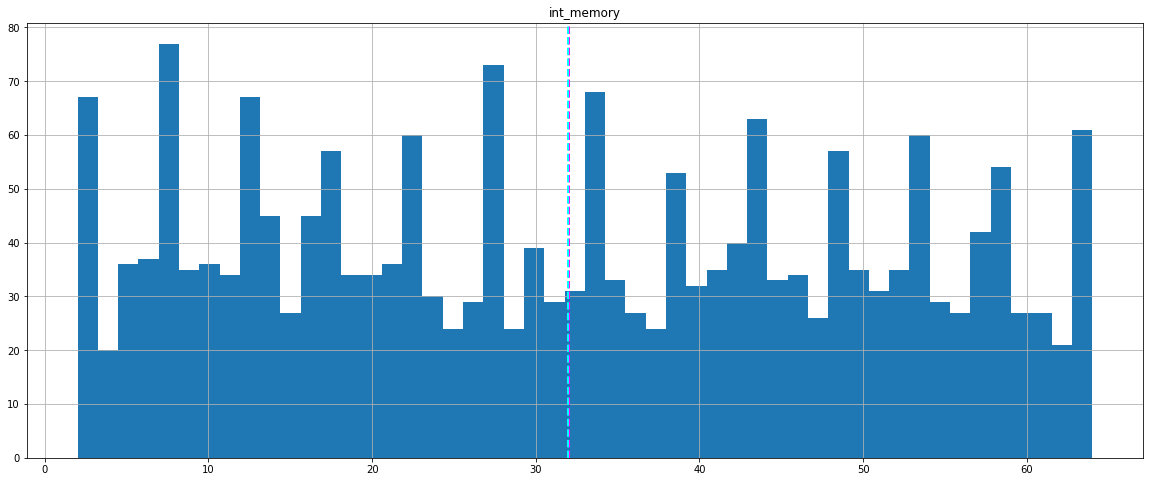

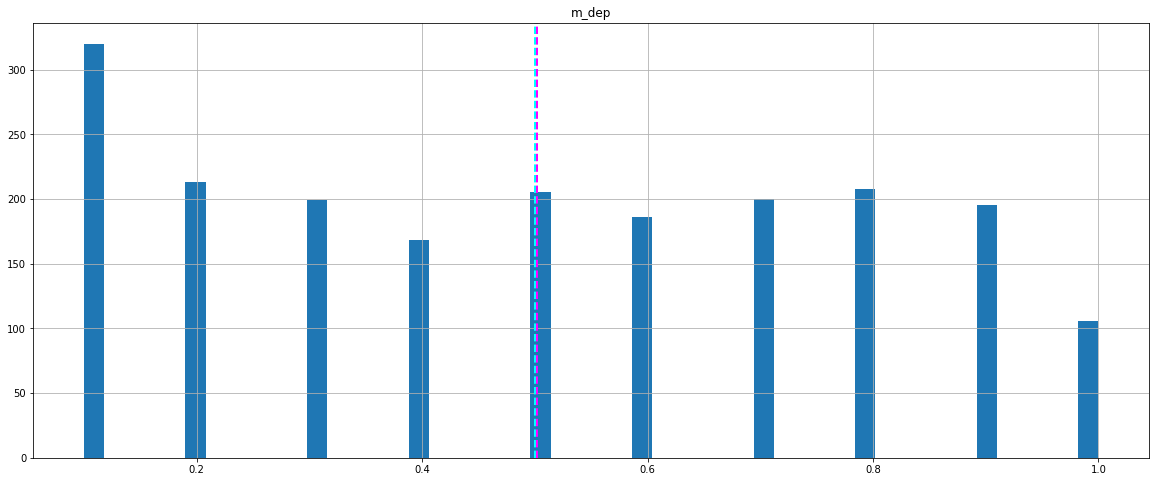

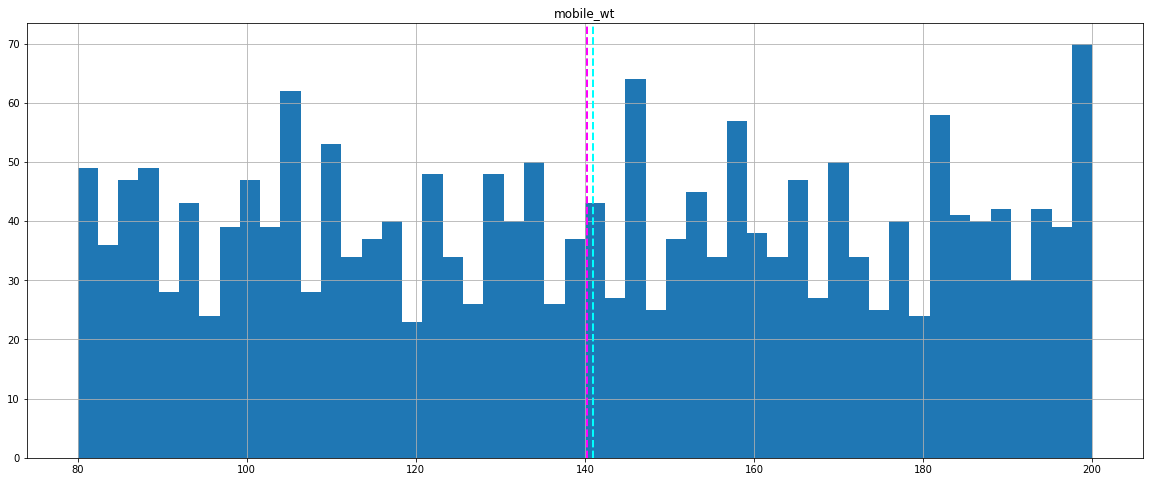

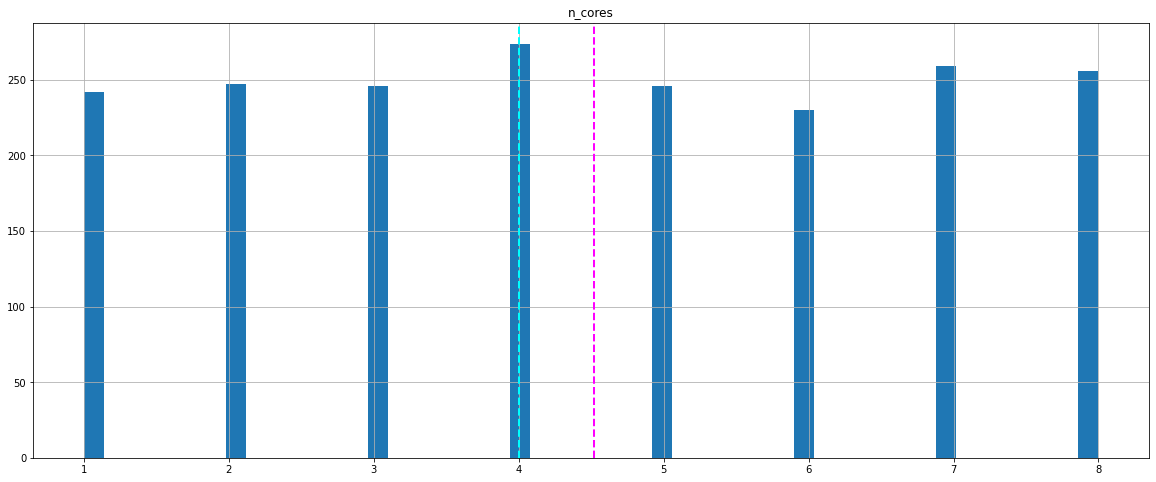

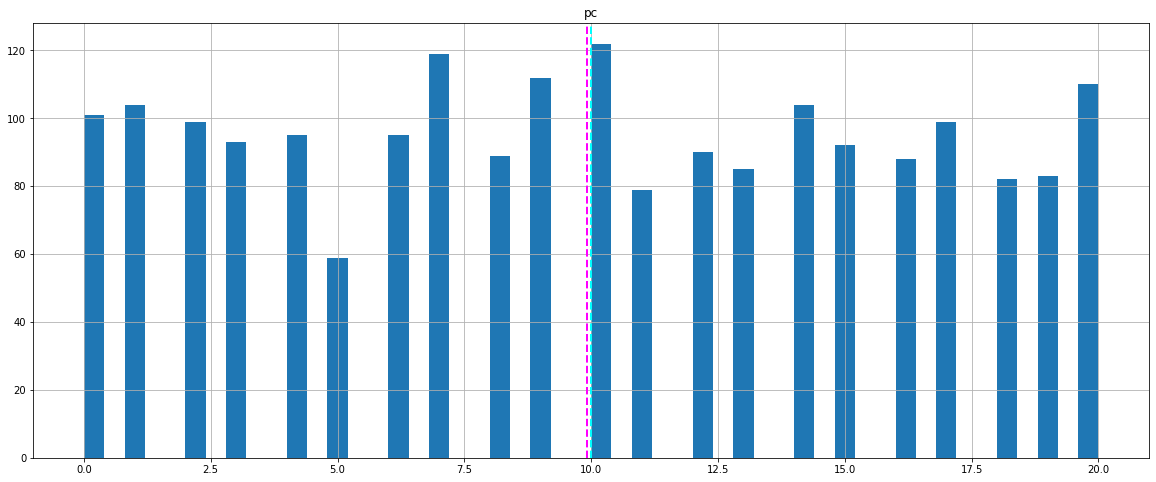

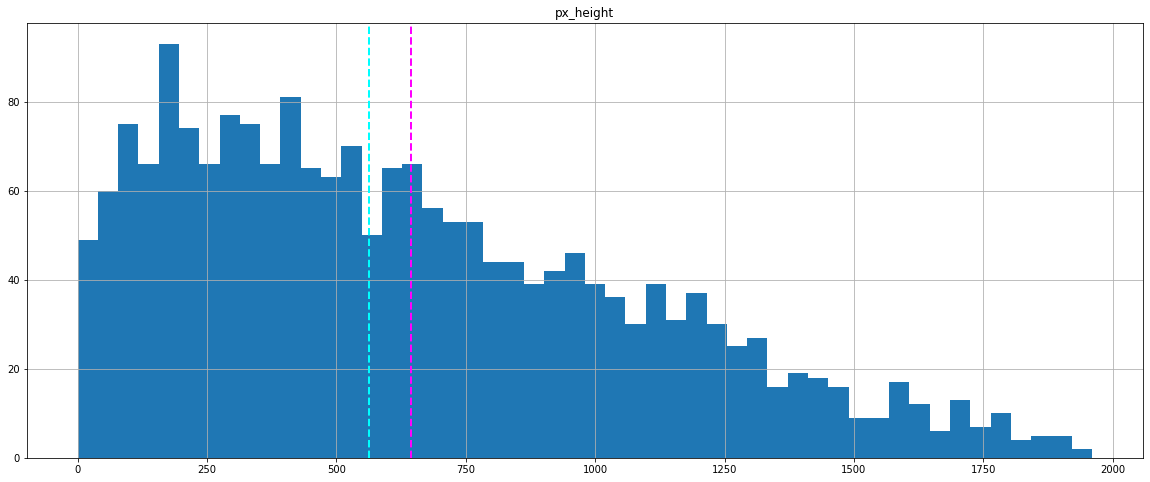

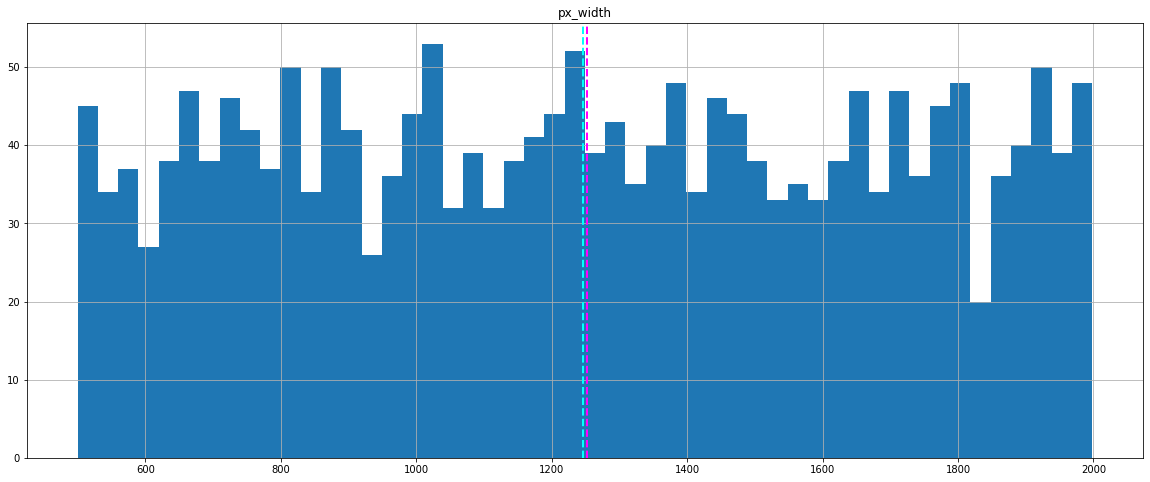

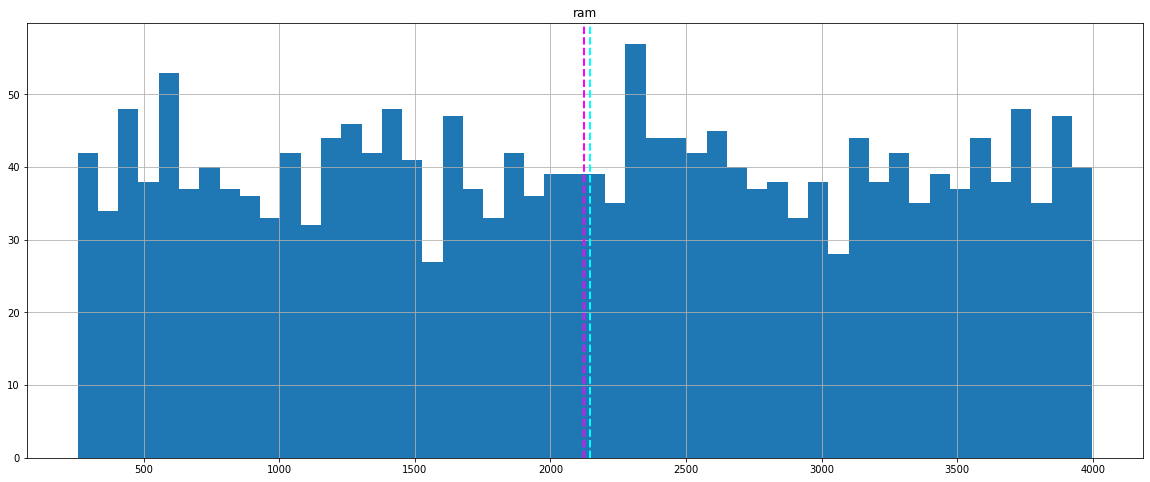

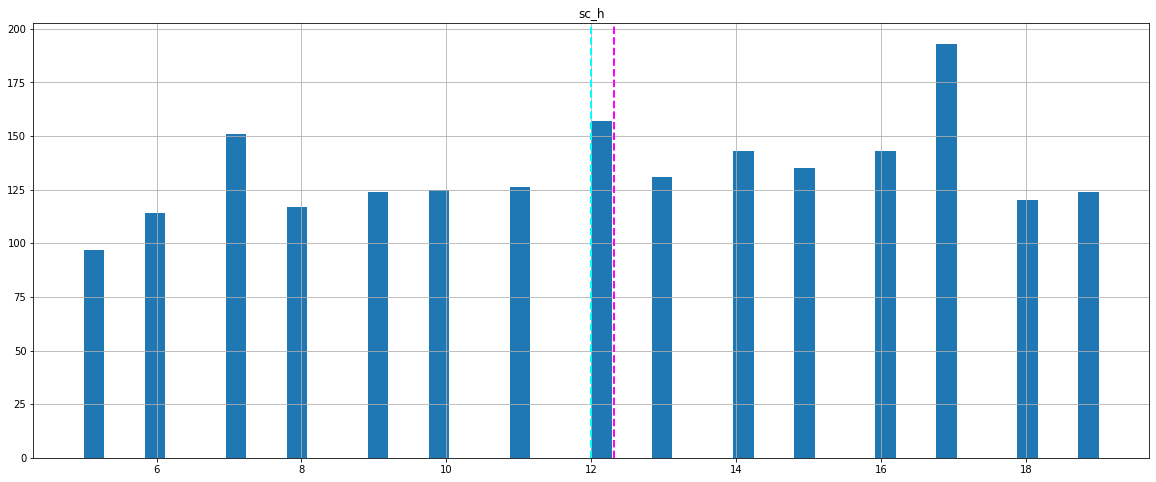

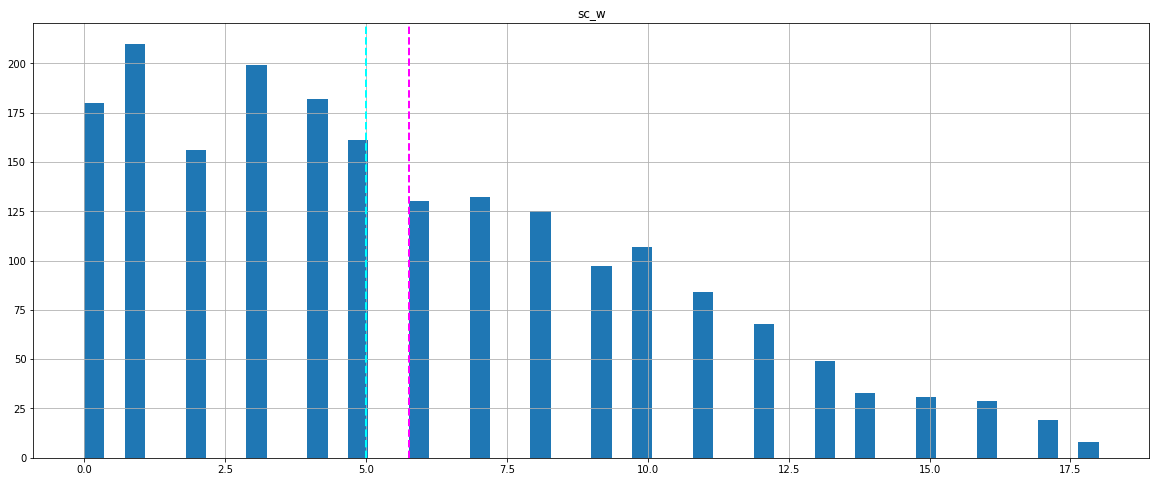

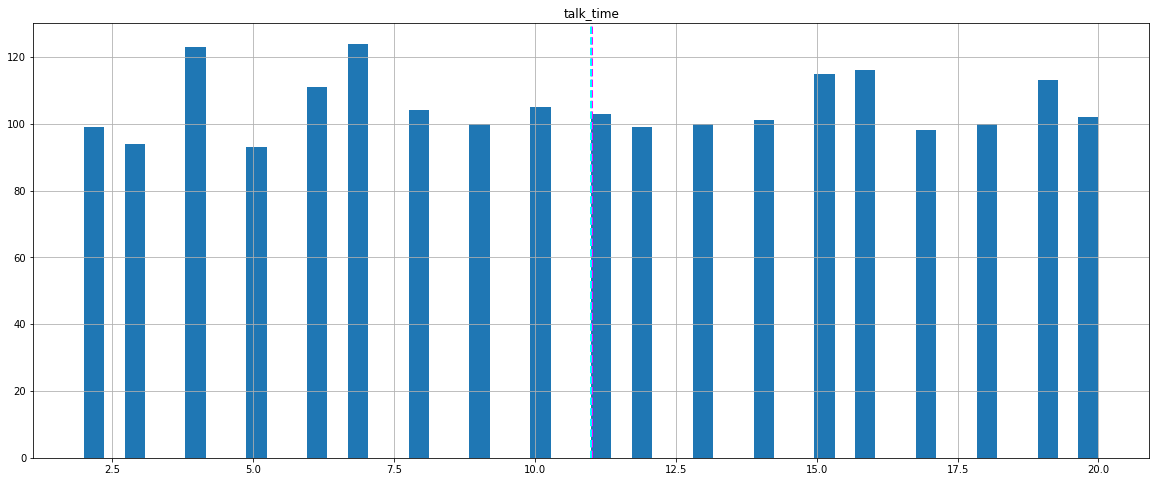

In [24]:
# Visualizing the numerical independent variables

for column in numerical_features :
    fig = plt.figure(figsize=(20,8))
    ax = fig.gca()
    feature = dataset[column]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(column)
plt.show()

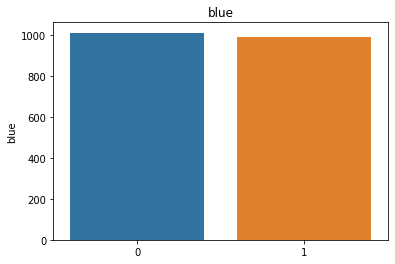

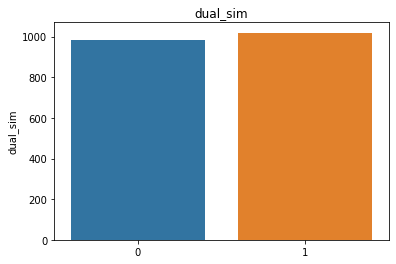

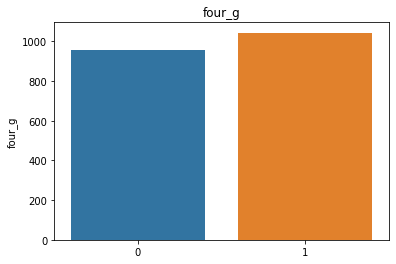

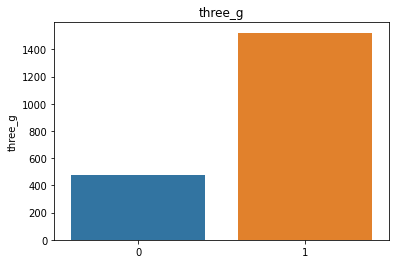

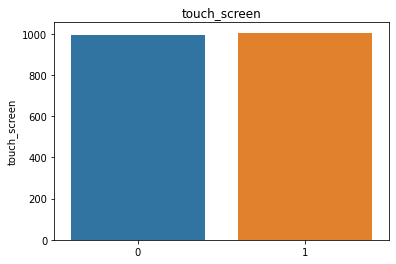

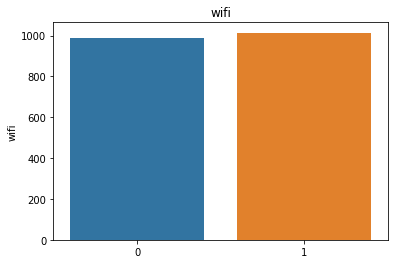

In [27]:
# Visualizing the categorical independent variables 

for col in categorical_features :
    sns.barplot(categorical_features[col].value_counts().index,categorical_features[col].value_counts()).set_title(col)
    plt.show()

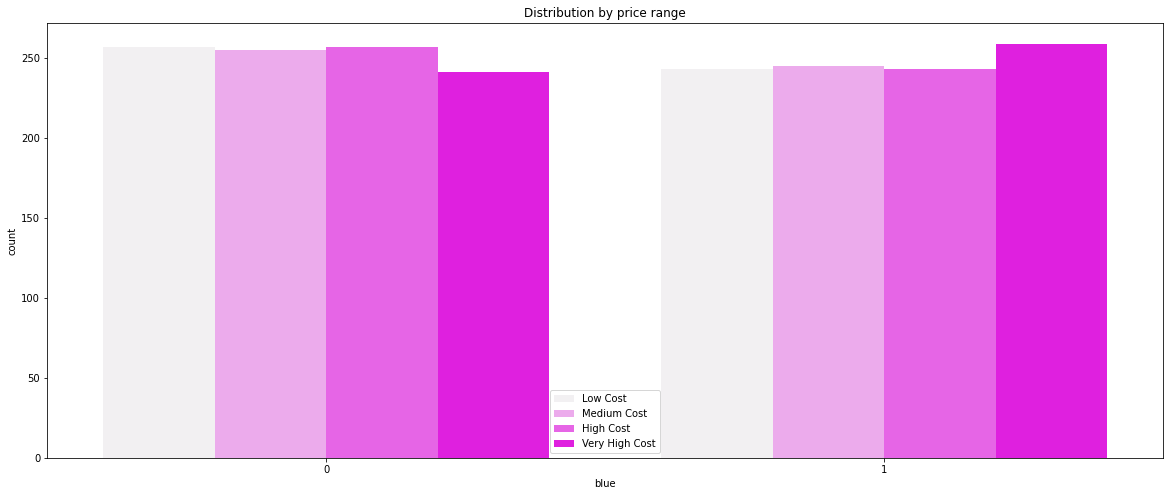

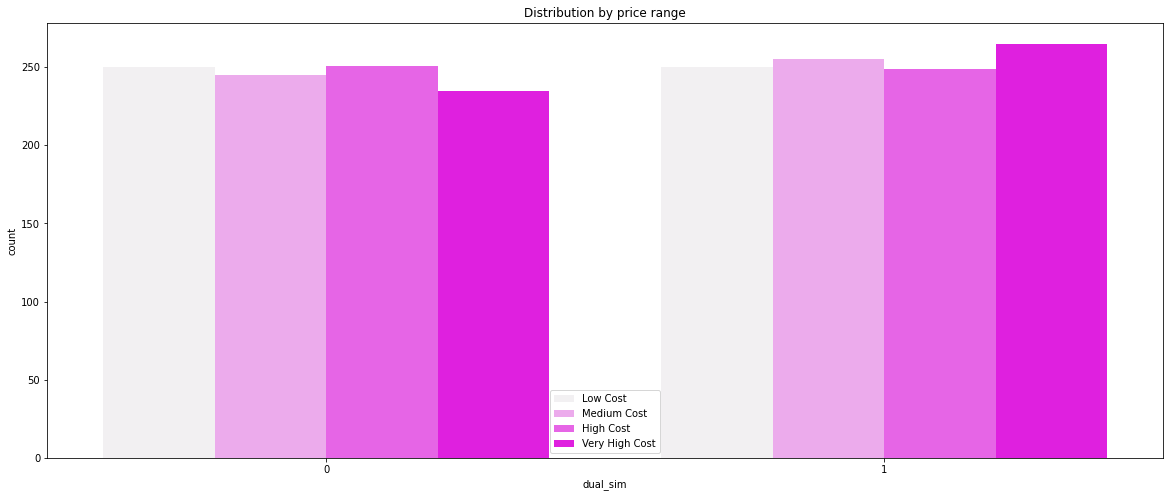

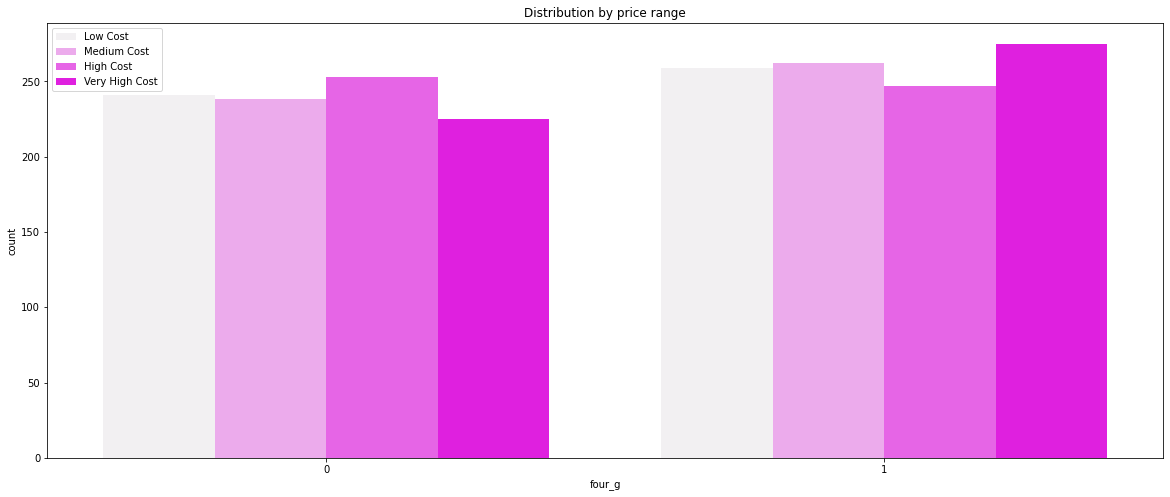

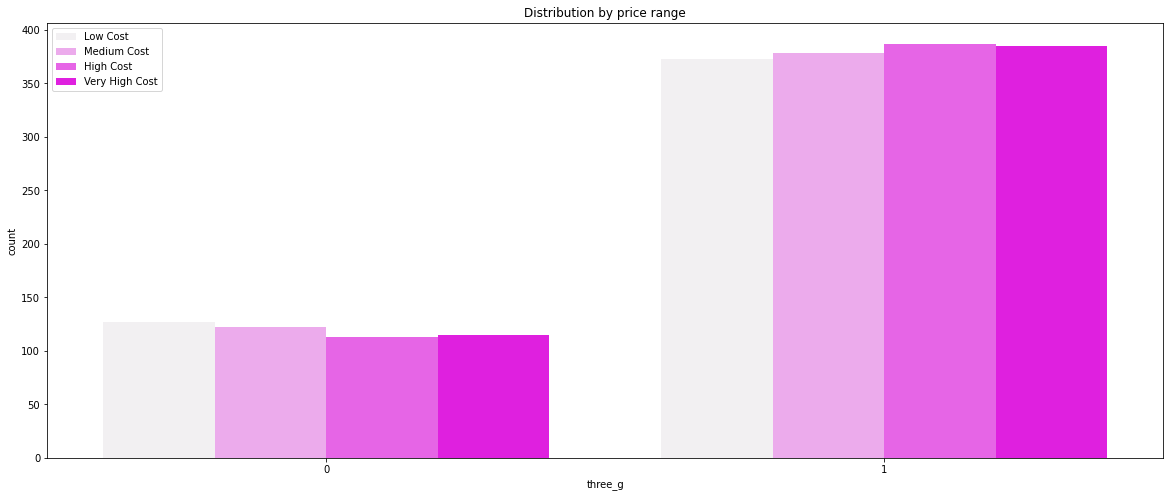

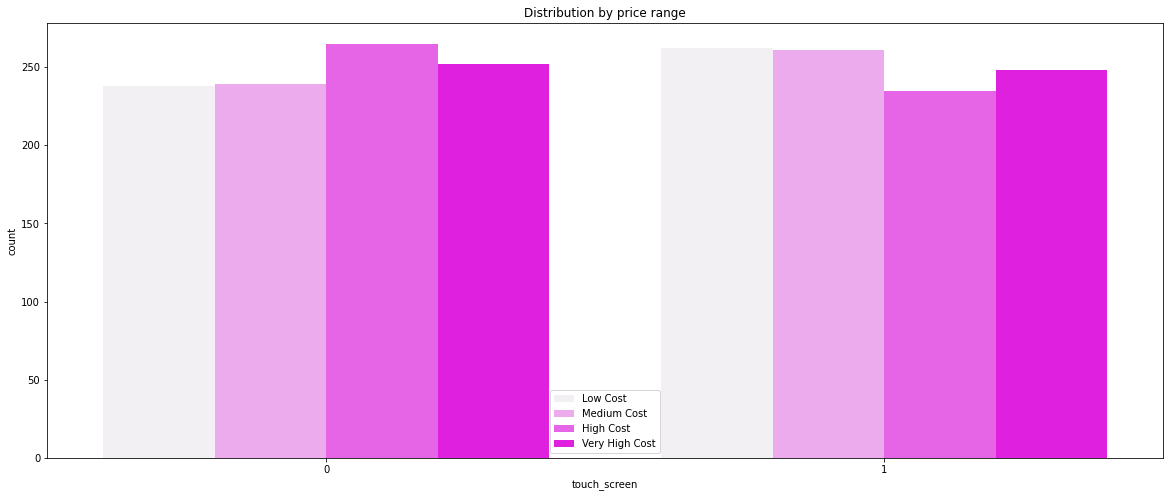

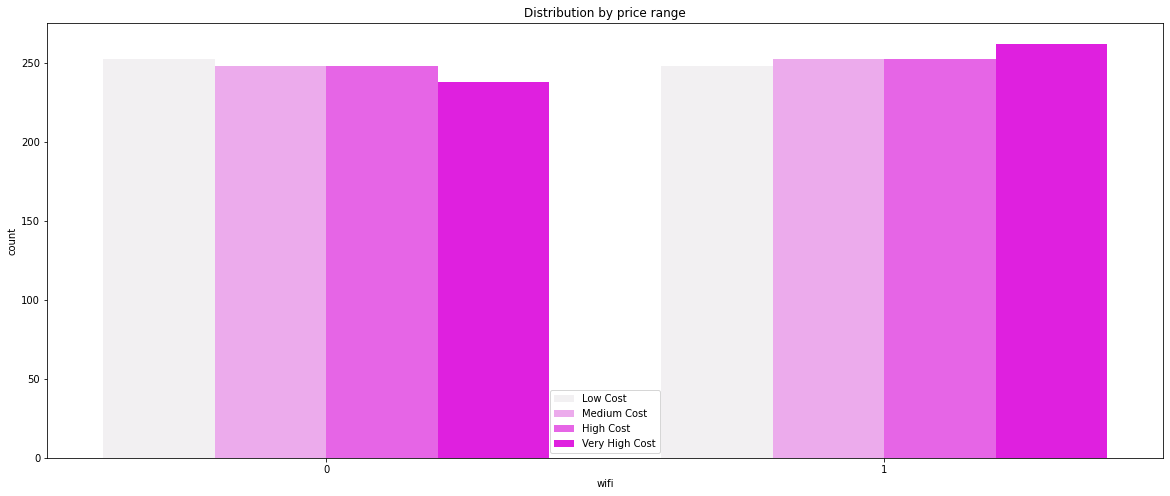

In [58]:
for col in categorical_features :

  fig = plt.figure(figsize=(20,8))
  ax = fig.gca()
  sns.countplot(data=dataset, x= col, hue="price_range", color = 'magenta')
  ax.set_title('Distribution by price range')
  ax.set_xlabel(col)
  ax.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])

<AxesSubplot:>

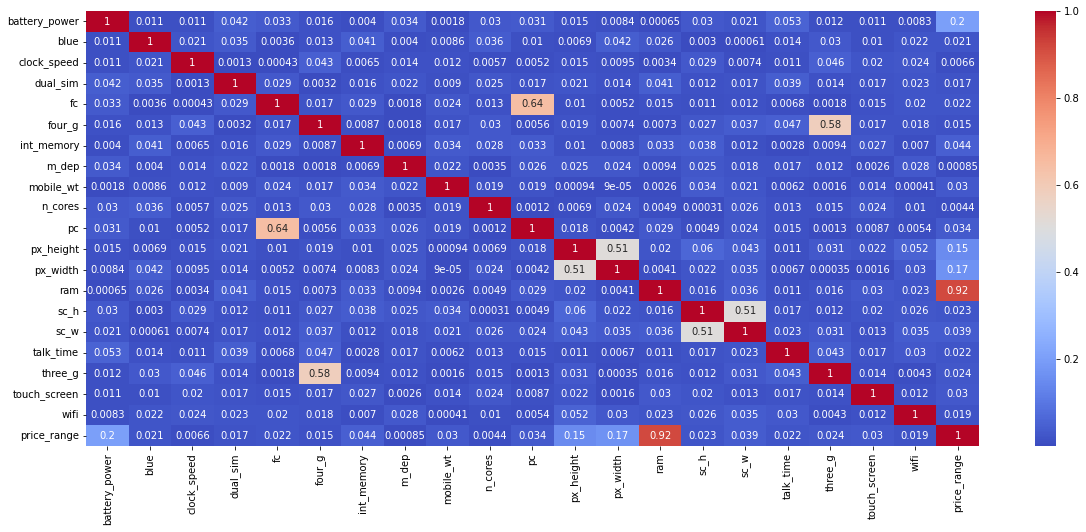

In [57]:
# Creating a heat map to visualise the corelation between all the features

plt.figure(figsize=(20,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')